# Оценка судебных исков

In [2]:
import pandas as pd
import plotly.express as px
import numpy as np

In [3]:
df = pd.read_csv("data/Ростикс_предобработка.csv")
df["date"] = pd.to_datetime(df["date"])
df["year"] =df["date"].dt.year 
df["month"] =df["date"].dt.month

In [4]:
df.head(2)

,Unnamed: 0,name_court,url_court,plaintiff,respondent,name_company,url_case,date,path,name_pdf,is_apply,is_respondent,debt,is_win,court_value,year,month
0,0,09.03.2023\nА19-4768/2023,https://kad.arbitr.ru/Card/6458e816-341e-467a-...,"ООО ""Иркутская энергосбытовая компания""","ООО ""Группа компаний ""Ростикс""",Ростикс,https://kad.arbitr.ru/Kad/PdfDocument/6458e816...,2023-06-13,/home/oem/Documents/Projects/PythonProjects/pa...,A19-4768-2023_20230313_Opredelenie.pdf,True,True,37149.0,False,0.125,2023,6
1,1,09.03.2023\nА19-4768/2023,https://kad.arbitr.ru/Card/6458e816-341e-467a-...,"ООО ""Иркутская энергосбытовая компания""","ООО ""Группа компаний ""Ростикс""",Ростикс,https://kad.arbitr.ru/Kad/PdfDocument/6458e816...,2023-05-22,/home/oem/Documents/Projects/PythonProjects/pa...,A19-4768-2023_20230313_Opredelenie.pdf,True,True,37149.0,False,0.125,2023,5


In [5]:
df_group = df.groupby([df.year, df.month]).agg(
    {"debt": "sum", "url_case": "count", "is_respondent": "sum", "is_win": "sum","court_value":"mean"})
df_group = df_group.reset_index()
df_group["date"] = pd.to_datetime(df_group.year.astype(
    str) + '/' + df_group.month.astype(str) + '/01')
df_group = df_group[df_group["date"].dt.year >= 2022]
df_group.rename(columns={"url_case": "count"}, inplace=True)


In [6]:
AuthC = float(800000)  # Уставной капитал "Ростикс"
AsC = float(699_900_000)  # Активы
df_group["a1"] = (df_group["debt"]/AuthC + df_group["debt"]/AsC)
df_group.replace([np.inf, -np.inf], 0, inplace=True)
df_group

,year,month,debt,count,is_respondent,is_win,court_value,date,a1
50,2022,1,0.0,2,0,0,0.625000,2022-01-01,0.000000
51,2022,2,0.0,1,0,0,0.625000,2022-02-01,0.000000
52,2022,4,0.0,2,0,0,0.625000,2022-04-01,0.000000
53,2022,6,0.0,1,0,0,0.625000,2022-06-01,0.000000
54,2022,7,0.0,2,0,0,0.625000,2022-07-01,0.000000
55,2022,8,0.0,1,0,0,0.625000,2022-08-01,0.000000
56,2022,9,0.0,2,0,2,1.000000,2022-09-01,0.000000
57,2022,10,0.0,4,0,2,0.812500,2022-10-01,0.000000
58,2022,11,0.0,1,0,1,1.000000,2022-11-01,0.000000
59,2022,12,0.0,4,0,1,0.718750,2022-12-01,0.000000


In [7]:
a_2 = []
for _, row in df_group.iterrows():
    tmp_dict = row.to_dict()
    tmp_date = tmp_dict["date"]
    tmp_df = df_group[df_group["date"]<=tmp_date]
    tmp_a2 = tmp_df["count"].mean() / tmp_df["count"].std()
    a_2.append(tmp_a2)
df_group["a2"] = a_2
df_group.replace([np.inf, -np.inf,np.nan], 3.33, inplace=True)

In [8]:
df_group

,year,month,debt,count,is_respondent,is_win,court_value,date,a1,a2
50,2022,1,0.0,2,0,0,0.625000,2022-01-01,0.000000,3.330000
51,2022,2,0.0,1,0,0,0.625000,2022-02-01,0.000000,2.121320
52,2022,4,0.0,2,0,0,0.625000,2022-04-01,0.000000,2.886751
53,2022,6,0.0,1,0,0,0.625000,2022-06-01,0.000000,2.598076
54,2022,7,0.0,2,0,0,0.625000,2022-07-01,0.000000,2.921187
55,2022,8,0.0,1,0,0,0.625000,2022-08-01,0.000000,2.738613
56,2022,9,0.0,2,0,2,1.000000,2022-09-01,0.000000,2.939874
57,2022,10,0.0,4,0,2,0.812500,2022-10-01,0.000000,1.891969
58,2022,11,0.0,1,0,1,1.000000,2022-11-01,0.000000,1.829318
59,2022,12,0.0,4,0,1,0.718750,2022-12-01,0.000000,1.732051


In [9]:
a_3 = []
for _, row in df_group.iterrows():
    tmp_dict = row.to_dict()
    tmp_date = tmp_dict["date"]
    tmp_df = df_group[df_group["date"] <= tmp_date]
    tmp_a3 = tmp_df["is_respondent"].sum()/tmp_df["count"].sum()
    a_3.append(tmp_a3)
df_group["a3"] = a_3
df_group.replace([np.inf, -np.inf, np.nan], 3.33, inplace=True)


In [10]:
df_group

,year,month,debt,count,is_respondent,is_win,court_value,date,a1,a2,a3
50,2022,1,0.0,2,0,0,0.625000,2022-01-01,0.000000,3.330000,0.000000
51,2022,2,0.0,1,0,0,0.625000,2022-02-01,0.000000,2.121320,0.000000
52,2022,4,0.0,2,0,0,0.625000,2022-04-01,0.000000,2.886751,0.000000
53,2022,6,0.0,1,0,0,0.625000,2022-06-01,0.000000,2.598076,0.000000
54,2022,7,0.0,2,0,0,0.625000,2022-07-01,0.000000,2.921187,0.000000
55,2022,8,0.0,1,0,0,0.625000,2022-08-01,0.000000,2.738613,0.000000
56,2022,9,0.0,2,0,2,1.000000,2022-09-01,0.000000,2.939874,0.000000
57,2022,10,0.0,4,0,2,0.812500,2022-10-01,0.000000,1.891969,0.000000
58,2022,11,0.0,1,0,1,1.000000,2022-11-01,0.000000,1.829318,0.000000
59,2022,12,0.0,4,0,1,0.718750,2022-12-01,0.000000,1.732051,0.000000


In [11]:
a_4 = []
for _, row in df_group.iterrows():
    tmp_dict = row.to_dict()
    tmp_date = tmp_dict["date"]
    tmp_df = df_group[df_group["date"] <= tmp_date]
    tmp_a4 = tmp_df["is_win"].sum()/tmp_df["count"].sum()
    a_4.append(tmp_a4)
df_group["a4"] = a_4
df_group.replace([np.inf, -np.inf, np.nan], 3.33, inplace=True)

In [12]:
df_group

,year,month,debt,count,is_respondent,is_win,court_value,date,a1,a2,a3,a4
50,2022,1,0.0,2,0,0,0.625000,2022-01-01,0.000000,3.330000,0.000000,0.000000
51,2022,2,0.0,1,0,0,0.625000,2022-02-01,0.000000,2.121320,0.000000,0.000000
52,2022,4,0.0,2,0,0,0.625000,2022-04-01,0.000000,2.886751,0.000000,0.000000
53,2022,6,0.0,1,0,0,0.625000,2022-06-01,0.000000,2.598076,0.000000,0.000000
54,2022,7,0.0,2,0,0,0.625000,2022-07-01,0.000000,2.921187,0.000000,0.000000
55,2022,8,0.0,1,0,0,0.625000,2022-08-01,0.000000,2.738613,0.000000,0.000000
56,2022,9,0.0,2,0,2,1.000000,2022-09-01,0.000000,2.939874,0.000000,0.181818
57,2022,10,0.0,4,0,2,0.812500,2022-10-01,0.000000,1.891969,0.000000,0.266667
58,2022,11,0.0,1,0,1,1.000000,2022-11-01,0.000000,1.829318,0.000000,0.312500
59,2022,12,0.0,4,0,1,0.718750,2022-12-01,0.000000,1.732051,0.000000,0.300000


In [13]:
df_group["a5"] = df_group["court_value"].copy()
df_group

,year,month,debt,count,is_respondent,is_win,court_value,date,a1,a2,a3,a4,a5
50,2022,1,0.0,2,0,0,0.625000,2022-01-01,0.000000,3.330000,0.000000,0.000000,0.625000
51,2022,2,0.0,1,0,0,0.625000,2022-02-01,0.000000,2.121320,0.000000,0.000000,0.625000
52,2022,4,0.0,2,0,0,0.625000,2022-04-01,0.000000,2.886751,0.000000,0.000000,0.625000
53,2022,6,0.0,1,0,0,0.625000,2022-06-01,0.000000,2.598076,0.000000,0.000000,0.625000
54,2022,7,0.0,2,0,0,0.625000,2022-07-01,0.000000,2.921187,0.000000,0.000000,0.625000
55,2022,8,0.0,1,0,0,0.625000,2022-08-01,0.000000,2.738613,0.000000,0.000000,0.625000
56,2022,9,0.0,2,0,2,1.000000,2022-09-01,0.000000,2.939874,0.000000,0.181818,1.000000
57,2022,10,0.0,4,0,2,0.812500,2022-10-01,0.000000,1.891969,0.000000,0.266667,0.812500
58,2022,11,0.0,1,0,1,1.000000,2022-11-01,0.000000,1.829318,0.000000,0.312500,1.000000
59,2022,12,0.0,4,0,1,0.718750,2022-12-01,0.000000,1.732051,0.000000,0.300000,0.718750


In [14]:
w1=w2=w3=w4=w5=1
df_group['grade'] = np.sqrt(w1*(df_group['a1']**2)+w2*(df_group['a2']**2)+w3 *
                      (df_group['a3']**2)+w4*(df_group['a4']**2)+w5*(df_group['a5']**2))
df_group

,year,month,debt,count,is_respondent,is_win,court_value,date,a1,a2,a3,a4,a5,grade
50,2022,1,0.0,2,0,0,0.625000,2022-01-01,0.000000,3.330000,0.000000,0.000000,0.625000,3.388145
51,2022,2,0.0,1,0,0,0.625000,2022-02-01,0.000000,2.121320,0.000000,0.000000,0.625000,2.211476
52,2022,4,0.0,2,0,0,0.625000,2022-04-01,0.000000,2.886751,0.000000,0.000000,0.625000,2.953635
53,2022,6,0.0,1,0,0,0.625000,2022-06-01,0.000000,2.598076,0.000000,0.000000,0.625000,2.672195
54,2022,7,0.0,2,0,0,0.625000,2022-07-01,0.000000,2.921187,0.000000,0.000000,0.625000,2.987300
55,2022,8,0.0,1,0,0,0.625000,2022-08-01,0.000000,2.738613,0.000000,0.000000,0.625000,2.809026
56,2022,9,0.0,2,0,2,1.000000,2022-09-01,0.000000,2.939874,0.000000,0.181818,1.000000,3.110613
57,2022,10,0.0,4,0,2,0.812500,2022-10-01,0.000000,1.891969,0.000000,0.266667,0.812500,2.076250
58,2022,11,0.0,1,0,1,1.000000,2022-11-01,0.000000,1.829318,0.000000,0.312500,1.000000,2.108094
59,2022,12,0.0,4,0,1,0.718750,2022-12-01,0.000000,1.732051,0.000000,0.300000,0.718750,1.899105


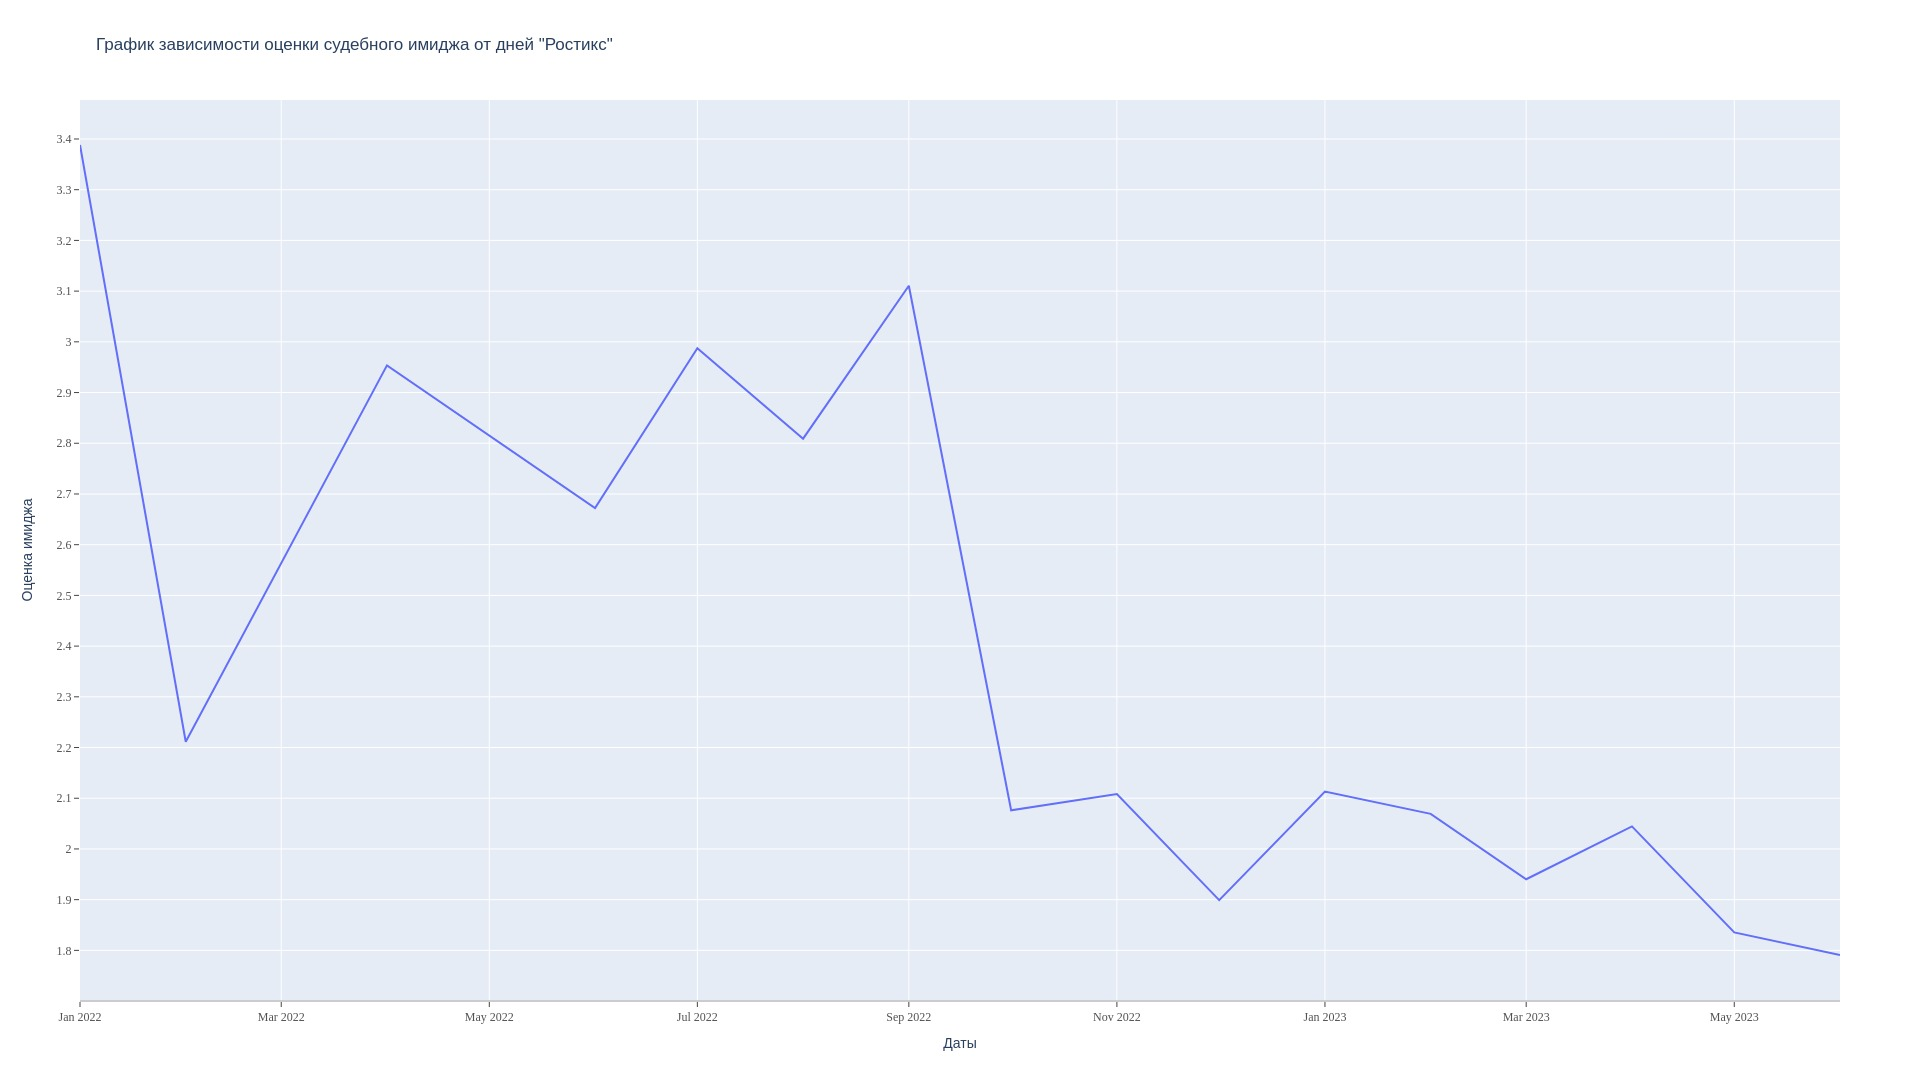

In [16]:
fig = px.line(df_group, x="date", y="grade",
              title='График зависимости оценки судебного имиджа от дней \"Ростикс\"')
fig.update_layout(xaxis_title='Даты', yaxis_title='Оценка имиджа',  xaxis=dict(
    showticklabels=True,
    linecolor='rgb(204, 204, 204)',
    linewidth=2,
    ticks='outside',
    tickfont=dict(
        family='Times New Roman',
        size=12,
        color='rgb(82, 82, 82)',
    )),
    yaxis=dict(
    ticks='outside',
    tickmode='linear',
    tick0=0,
    dtick=0.1,
    tickfont=dict(
        family='Times New Roman',
        size=12,
        color='rgb(82, 82, 82)',
    )))
fig.show("jpeg",width=1920,height=1080)
